# Exploration des relevés de données des bâtiments 

In [1]:
import pandas as pd
import numpy as np 

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pingouin as pg

import missingno as msno

In [2]:
sns.set_palette("Pastel2")

## Traitement des données de 2015

In [3]:
filepath_2015 = 'datasets/2015-building-energy-benchmarking.csv'
df_2015 = pd.read_csv(filepath_2015)
df_2015.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081


In [4]:
df_2015['PropertyName'] = df_2015["PropertyName"].str.capitalize()
df_2015['Neighborhood'] = df_2015["Neighborhood"].str.capitalize()

In [5]:
df_2015.isnull().mean() * 100

OSEBuildingID                                                     0.000000
DataYear                                                          0.000000
BuildingType                                                      0.000000
PrimaryPropertyType                                               0.000000
PropertyName                                                      0.000000
TaxParcelIdentificationNumber                                     0.059880
Location                                                          0.000000
CouncilDistrictCode                                               0.000000
Neighborhood                                                      0.000000
YearBuilt                                                         0.000000
NumberofBuildings                                                 0.000000
NumberofFloors                                                    0.239521
PropertyGFATotal                                                  0.000000
PropertyGFAParking       

In [6]:
df_2015 = df_2015.loc[:, df_2015.isnull().mean() <.50]
df_2015.dropna(thresh=4, inplace=True)

In [7]:
df_2015.drop(["TaxParcelIdentificationNumber","Location","CouncilDistrictCode",
              "ListOfAllPropertyUseTypes", "LargestPropertyUseType", "PropertyGFAParking",
              "DefaultData", "ComplianceStatus", 
              "Seattle Police Department Micro Community Policing Plan Areas","SPD Beats", "Zip Codes"], axis = 1, inplace=True) 

In [8]:
df_2015.rename(columns={"GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions",
                        "GHGEmissionsIntensity(kgCO2e/ft2)" : "GHGEmissionsIntensity"}, inplace=True)

## Traitement des données de 2016

In [9]:
filepath_2016 = 'datasets/2016-building-energy-benchmarking.csv'
df_2016 = pd.read_csv(filepath_2016)
df_2016.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19


In [10]:
df_2016['PropertyName'] = df_2016["PropertyName"].str.capitalize()
df_2016['Neighborhood'] = df_2016["Neighborhood"].str.capitalize()

In [11]:
df_2016.isnull().mean() * 100

OSEBuildingID                        0.000000
DataYear                             0.000000
BuildingType                         0.000000
PrimaryPropertyType                  0.000000
PropertyName                         0.000000
Address                              0.000000
City                                 0.000000
State                                0.000000
ZipCode                              0.473934
TaxParcelIdentificationNumber        0.000000
CouncilDistrictCode                  0.000000
Neighborhood                         0.000000
Latitude                             0.000000
Longitude                            0.000000
YearBuilt                            0.000000
NumberofBuildings                    0.236967
NumberofFloors                       0.000000
PropertyGFATotal                     0.000000
PropertyGFAParking                   0.000000
PropertyGFABuilding(s)               0.000000
ListOfAllPropertyUseTypes            0.266588
LargestPropertyUseType            

In [12]:
df_2016 = df_2016.loc[:, df_2016.isnull().mean() <.50]
df_2016.dropna(thresh=4, inplace=True) 

In [13]:
df_2016.drop(["TaxParcelIdentificationNumber", "Address", "City", "State", "Latitude", "Longitude","ZipCode","CouncilDistrictCode",
              "ListOfAllPropertyUseTypes", "LargestPropertyUseType", "PropertyGFAParking",
              "DefaultData", "ComplianceStatus"], axis = 1, inplace=True) 

## Création d'un dataset avec les données de 2015 & 2016

In [14]:
df = pd.concat([df_2015,df_2016], join="outer", ignore_index=True, verify_integrity=True)
df.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,Mayflower park hotel,Downtown,1927,1.0,12.0,88434,...,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64
1,2,2015,NonResidential,Hotel,Paramount hotel,Downtown,1996,1.0,11.0,103566,...,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38
2,3,2015,NonResidential,Hotel,Westin hotel,Downtown,1969,1.0,41.0,961990,...,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92


## Traitement du dataset crée

In [15]:
df = df.loc[(df["BuildingType"] == "NonResidential") |
            (df["BuildingType"] == "SPS-District K-12")| 
            (df["BuildingType"] == "Nonresidential COS")|
            (df["BuildingType"] == "Campus")]

In [16]:
char_correction = {"Distribution Center\n" : "Distribution Center",
                   "Self-Storage Facility\n" : "Self-Storage Facility",
                   "Restaurant\n" : "Restaurant"}

for key, value in char_correction.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

C:\Users\cecil\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [17]:
df = df.loc[~(df["PrimaryPropertyType"] == "Low-Rise Multifamily")]

In [18]:
df.shape

(3312, 27)

## Analyse exploratoire

## Séparation du jeu de données

On crée un jeu de données d'entraînement qui va être celui que l'on va analyser durant l'analyse exploratoire des données. Le jeu de test sera laissé de côté pour valider nos modèles. 

In [19]:
from sklearn.model_selection import train_test_split

test_set, train_set = train_test_split(df, test_size=0.2, random_state=42)

In [20]:
test_set.to_csv("datasets/test_set.csv")
train_set.to_csv("datasets/train_set.csv")

In [21]:
df = test_set.copy()

### Analyses univariées

In [22]:
df.shape

(2649, 27)

In [23]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

In [24]:
cat_var = ["DataYear", "BuildingType", "PrimaryPropertyType", "Neighborhood",
           "NumberofBuildings"]

num_var = ["YearBuilt", "NumberofFloors", "PropertyGFATotal", "PropertyGFABuilding(s)",
           "ENERGYSTARScore", "SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)", "SourceEUI(kBtu/sf)",
           "SourceEUIWN(kBtu/sf)", "SiteEnergyUse(kBtu)", "SiteEnergyUseWN(kBtu)", "SteamUse(kBtu)",
           "Electricity(kWh)", "Electricity(kBtu)", "NaturalGas(therms)", "NaturalGas(kBtu)", 
           "OtherFuelUse(kBtu)","TotalGHGEmissions", "GHGEmissionsIntensity"]

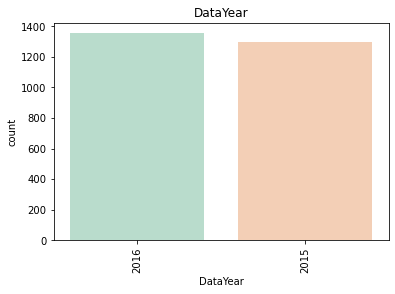

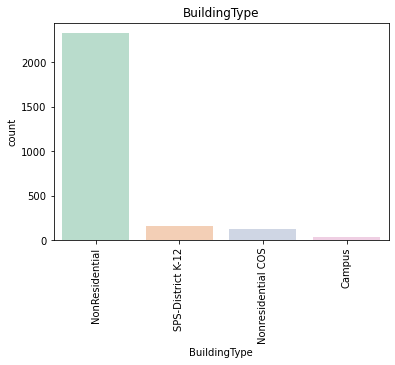

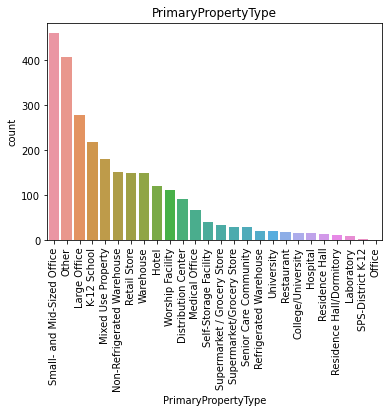

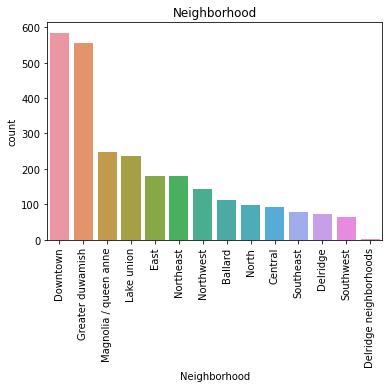

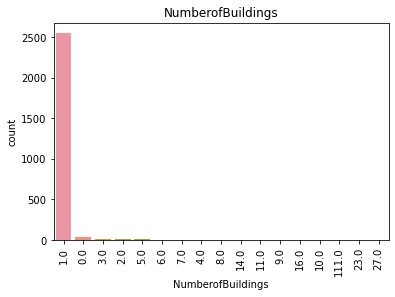

In [25]:
for cols in cat_var:
    sns.countplot(x=cols, data=df, order=df[cols].value_counts().index)
    plt.title(cols)
    plt.xticks(rotation=90)
    plt.show()

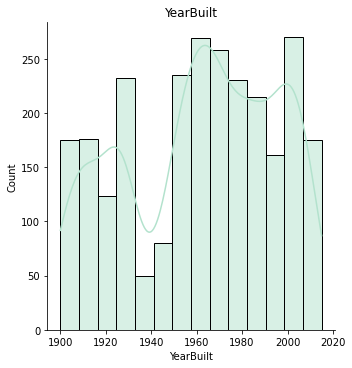

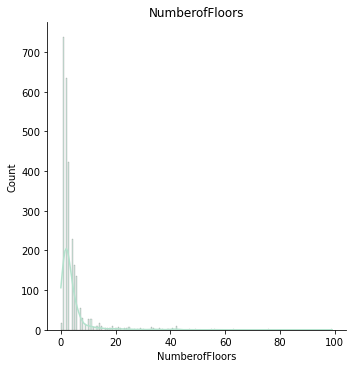

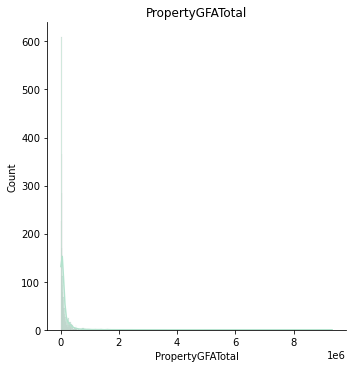

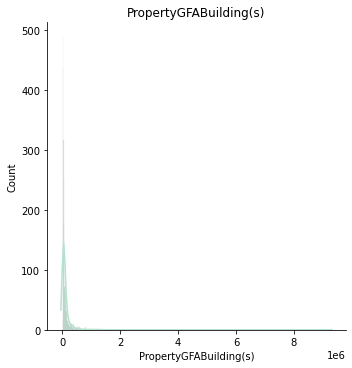

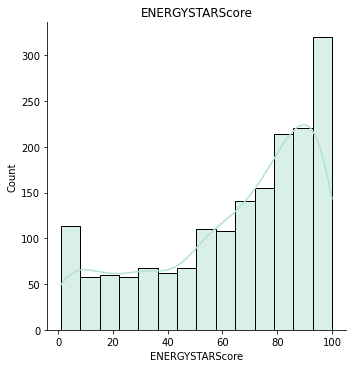

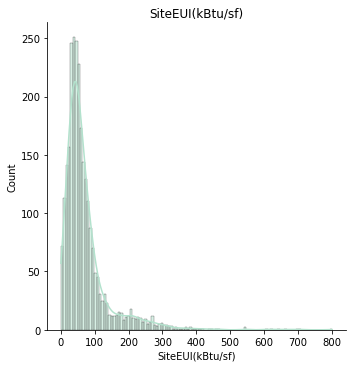

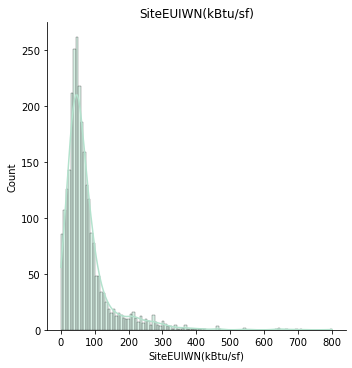

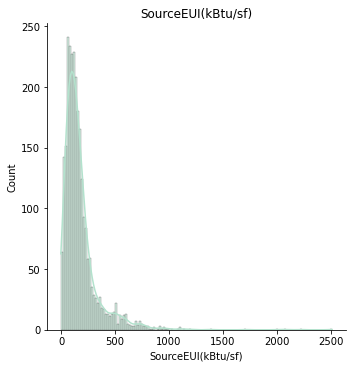

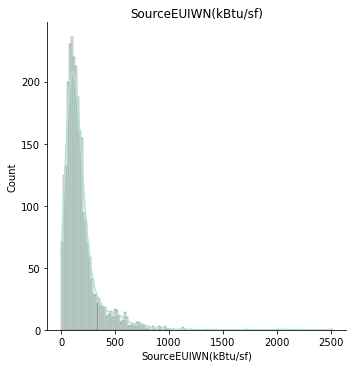

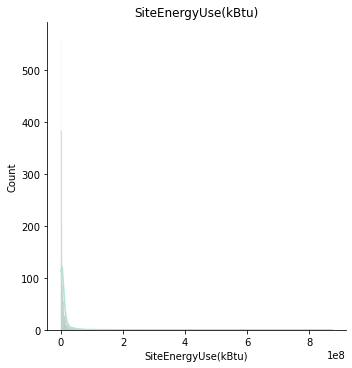

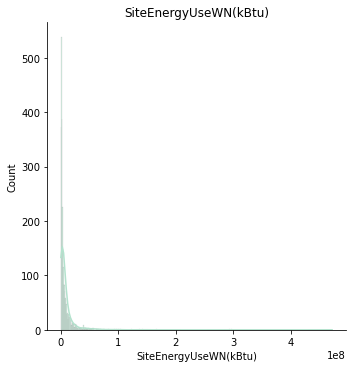

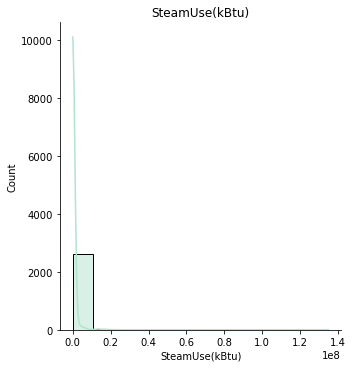

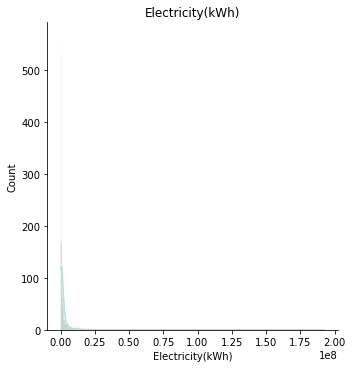

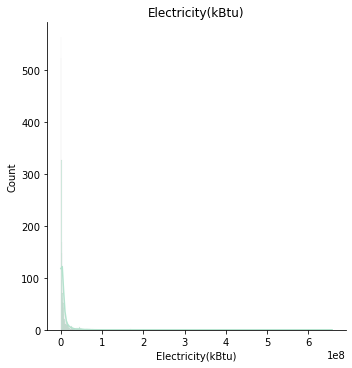

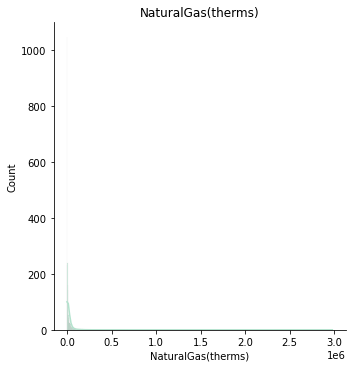

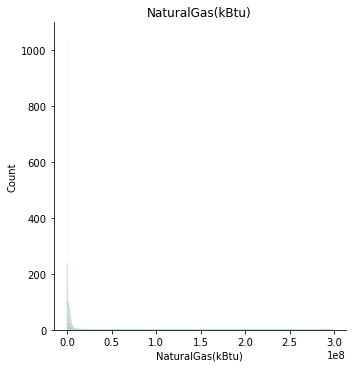

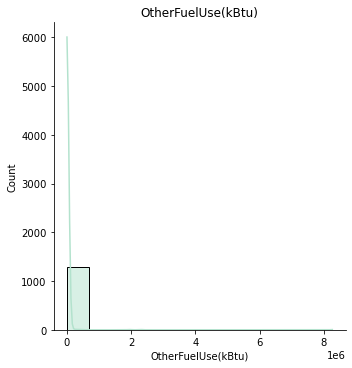

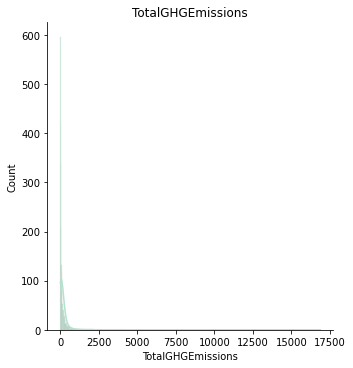

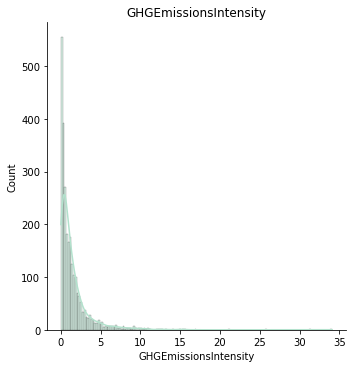

In [26]:
for cols in num_var:
    sns.displot(x=cols, data=df, kde=True)
    plt.title(cols)
    plt.show()

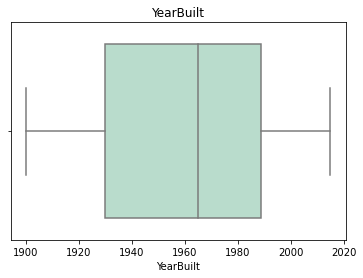

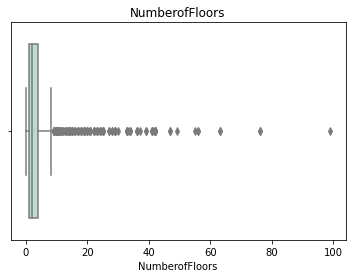

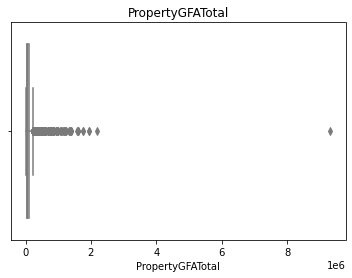

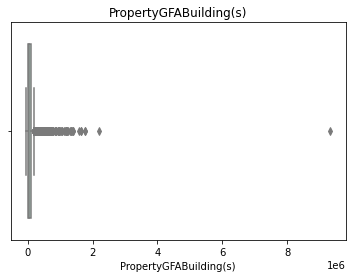

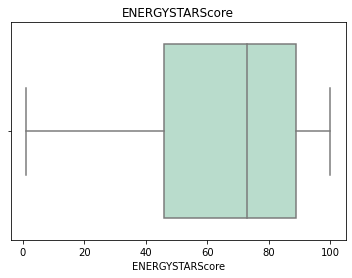

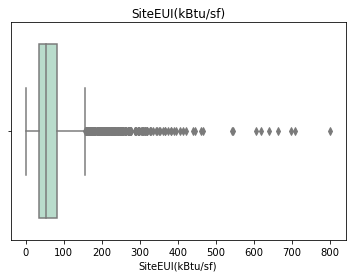

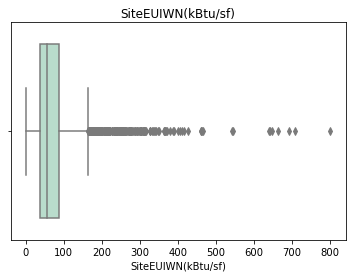

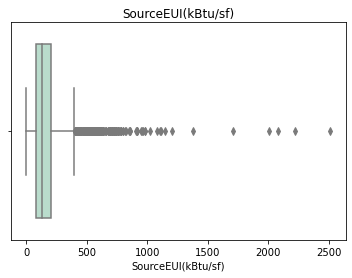

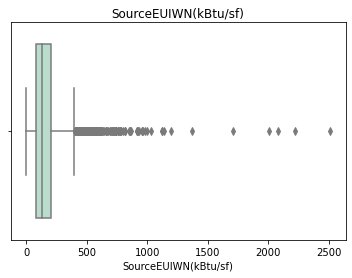

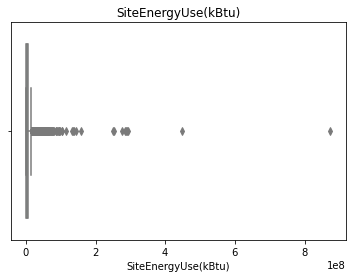

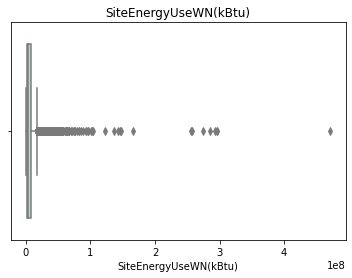

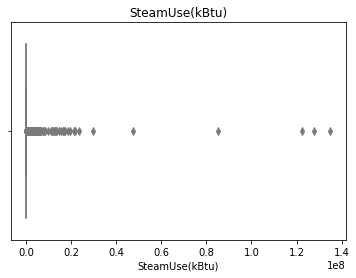

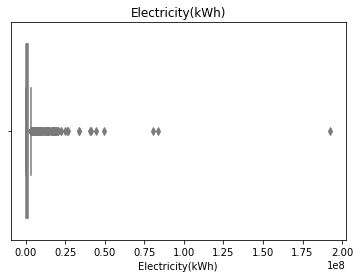

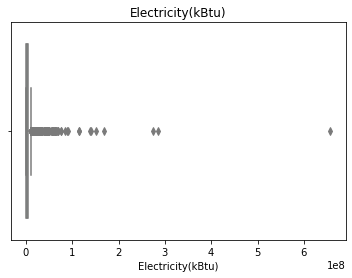

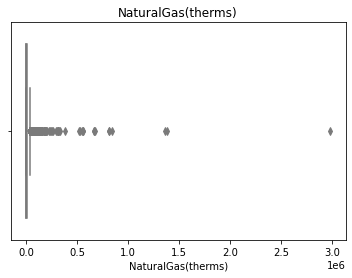

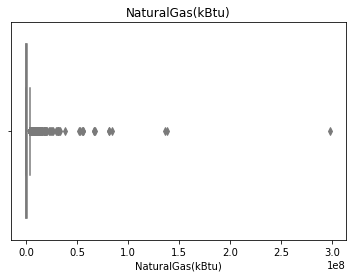

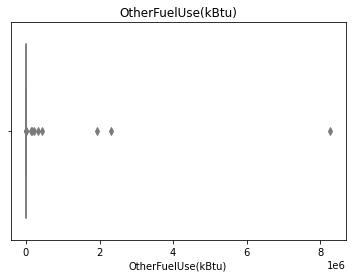

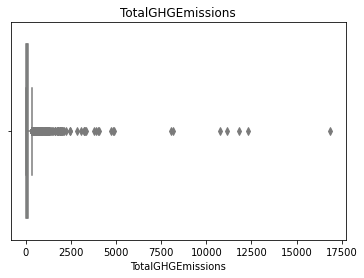

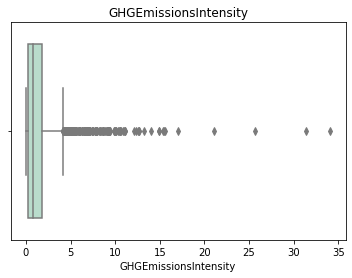

In [27]:
for cols in num_var:
    sns.boxplot(x=cols, data=df)
    plt.title(cols)
    plt.show()

In [28]:
pg.normality(df,method="normaltest")

,W,pval,normal
OSEBuildingID,71.733811,2.649726e-16,False
DataYear,9384.242852,0.000000e+00,False
YearBuilt,806.261362,8.367000e-176,False
NumberofBuildings,7712.797367,0.000000e+00,False
NumberofFloors,2944.129740,0.000000e+00,False
PropertyGFATotal,5676.529880,0.000000e+00,False
PropertyGFABuilding(s),6066.758138,0.000000e+00,False
LargestPropertyUseTypeGFA,6135.777510,0.000000e+00,False
ENERGYSTARScore,192.522254,1.564313e-42,False
SiteEUI(kBtu/sf),2007.668430,0.000000e+00,False


In [29]:
pg.homoscedasticity(df, method="levene")

,W,pval,equal_var
levene,NaN,NaN,False


In [30]:
df.drop(["OSEBuildingID", "DataYear"], axis=1, inplace=True)

In [31]:
df.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,2649.000000,2649.000000,2643.000000,2.649000e+03,2.649000e+03,2.592000e+03,1757.000000,2642.000000,2642.000000,2643.000000,...,2.643000e+03,2.642000e+03,2.643000e+03,2.643000e+03,2.643000e+03,2.643000e+03,2.643000e+03,1.289000e+03,2643.000000,2643.000000
mean,1961.565496,1.129105,4.146425,1.167258e+05,1.035244e+05,9.672195e+04,64.696642,71.877933,75.103066,176.223383,...,8.282414e+06,8.136118e+06,4.618839e+05,1.687823e+06,5.758960e+06,1.983940e+04,1.983940e+06,1.075139e+04,181.166133,1.489455
std,32.627411,2.361563,6.597958,2.619453e+05,2.469772e+05,2.410594e+05,29.055494,71.528400,72.938508,177.204370,...,2.688321e+07,2.137366e+07,5.001466e+06,5.452771e+06,1.860504e+07,8.656382e+04,8.656382e+06,2.456582e+05,689.962512,2.225065
min,1900.000000,0.000000,0.000000,1.168500e+04,-5.055000e+04,5.656000e+03,1.000000,0.000000,0.000000,-2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1930.000000,1.000000,1.000000,2.952500e+04,2.853100e+04,2.564175e+04,46.000000,33.500000,36.000000,77.350002,...,1.242715e+06,1.343374e+06,0.000000e+00,2.155729e+05,7.355490e+05,0.000000e+00,0.000000e+00,0.000000e+00,19.710000,0.270000
50%,1965.000000,1.000000,2.000000,4.968000e+04,4.755400e+04,4.369450e+04,73.000000,51.900001,54.950000,131.300003,...,2.540153e+06,2.706363e+06,0.000000e+00,4.745536e+05,1.619177e+06,4.809920e+03,4.809920e+05,0.000000e+00,49.680000,0.800000
75%,1989.000000,1.000000,4.000000,1.060000e+05,9.471300e+04,9.091050e+04,89.000000,82.100000,86.575000,206.400000,...,7.160192e+06,7.446841e+06,0.000000e+00,1.460026e+06,4.981818e+06,1.509049e+04,1.509050e+06,0.000000e+00,140.060000,1.805000
max,2015.000000,111.000000,99.000000,9.320156e+06,9.320156e+06,9.320156e+06,100.000000,800.600000,800.600000,2511.100000,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,8.269669e+06,16870.980000,34.090000


### Analyses bivariées

In [32]:
df.drop(["PropertyGFABuilding(s)","LargestPropertyUseTypeGFA", "SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)", "SourceEUI(kBtu/sf)",
         "SourceEUIWN(kBtu/sf)", "SiteEnergyUseWN(kBtu)", "Electricity(kWh)", "NaturalGas(therms)"], axis=1, inplace=True)

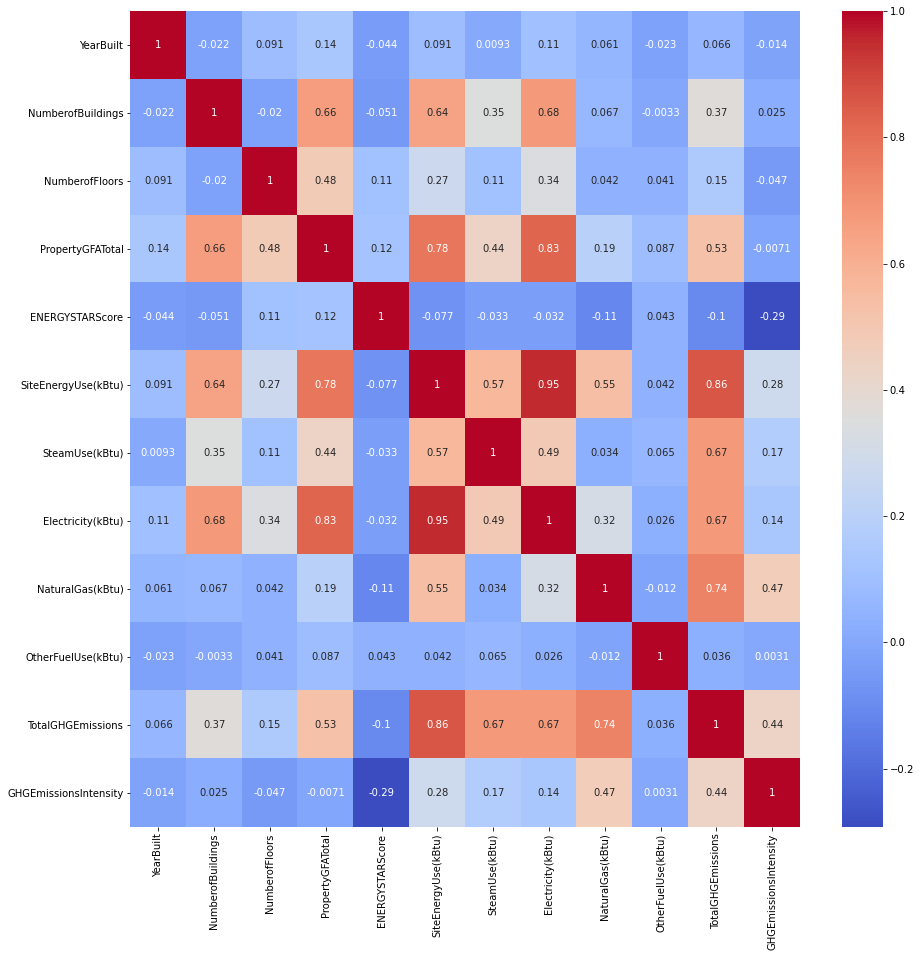

In [33]:
matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(matrix, annot=True, cmap="coolwarm")
plt.show()